   Iteration  HiveQL_Time  SparkSQL_Time
0          1       47.165         50.591
1          2       44.515         46.060
2          3       40.606         43.760
3          4       43.132         41.166
4          5       43.893         44.501


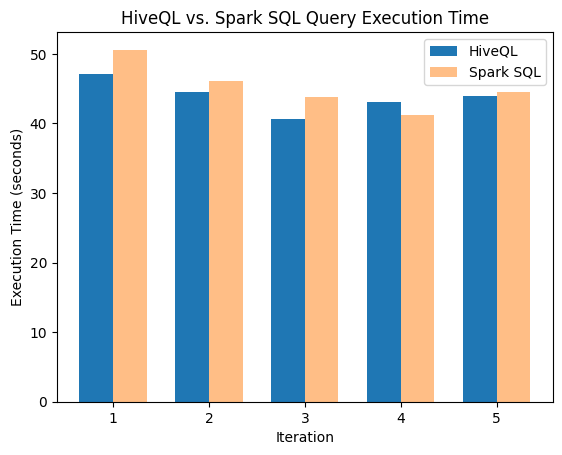

In [41]:
import pandas as pd
import re

# Specify data types as strings during CSV reading
df = pd.read_csv('execution_times.csv')

# Function to convert time format to seconds
def convert_time_to_seconds(time_str):
    # Use regular expression to extract minutes and seconds
    match = re.match(r'(?:(\d+)m)?([\d.]+)s', time_str.strip())  # Use strip() to remove whitespaces
    if match:
        minutes, seconds = map(lambda x: float(x) if x else 0, match.groups())
        return minutes * 60 + seconds
    else:
        return None

# Apply the function to transform time columns to seconds and handle whitespaces
df['HiveQL_Time'] = df['HiveQL_Time'].apply(lambda x: convert_time_to_seconds(x) if pd.notna(x) else None)
df['SparkSQL_Time'] = df['SparkSQL_Time'].apply(lambda x: convert_time_to_seconds(x) if pd.notna(x) else None)

# Display the transformed DataFrame
print(df)

plt.bar(positions - bar_width/2, df['HiveQL_Time'], bar_width, label='HiveQL')
plt.bar(positions + bar_width/2, df['SparkSQL_Time'], bar_width, label='Spark SQL', alpha=0.5)  # Use alpha to make bars semi-transparent
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.title('HiveQL vs. Spark SQL Query Execution Time')
plt.xticks(positions, df['Iteration'])
plt.legend();

                     Mapping  HiveQL_Time  SparkSQL_Time
0         Career delay query       58.340         43.824
1            Nas delay query       42.040         41.719
2        Weather delay query       43.682         44.415
3  Late aircraft delay query       42.455         43.383
4       Security delay query       34.011         44.908


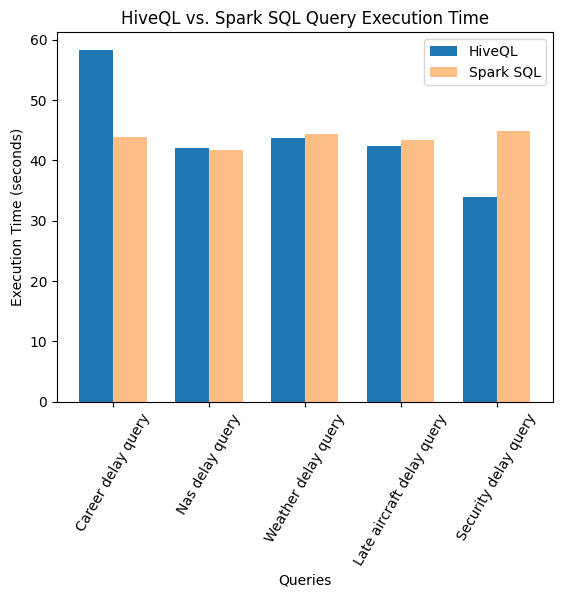

In [47]:
import pandas as pd
import re

# Specify data types as strings during CSV reading
df = pd.read_csv('execution_times_table.csv')

# Function to convert time format to seconds
def convert_time_to_seconds(time_str):
    # Use regular expression to extract minutes and seconds
    match = re.match(r'(?:(\d+)m)?([\d.]+)s', time_str.strip())  # Use strip() to remove whitespaces
    if match:
        minutes, seconds = map(lambda x: float(x) if x else 0, match.groups())
        return minutes * 60 + seconds
    else:
        return None

# # Apply the function to transform time columns to seconds and handle whitespaces
df['HiveQL_Time'] = df['HiveQL_Time'].apply(lambda x: convert_time_to_seconds(x) if pd.notna(x) else None)
df['SparkSQL_Time'] = df['SparkSQL_Time'].apply(lambda x: convert_time_to_seconds(x) if pd.notna(x) else None)

# Display the transformed DataFrame
print(df)

plt.bar(positions - bar_width/2, df['HiveQL_Time'], bar_width, label='HiveQL')
plt.bar(positions + bar_width/2, df['SparkSQL_Time'], bar_width, label='Spark SQL', alpha=0.5)  # Use alpha to make bars semi-transparent
plt.xlabel('Queries')
plt.ylabel('Execution Time (seconds)')
plt.title('HiveQL vs. Spark SQL Query Execution Time')
plt.xticks(positions, df['Mapping'],rotation=60)
plt.legend();